In [102]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
   
def see_plot(pict, color='gray', size=(4,4)):
    plt.figure(figsize=size)
    plt.imshow(pict, cmap=color)
    #plt.grid()
    plt.show()
    
df = pd.read_csv('dataset_for_moving.csv')

Сектор 1


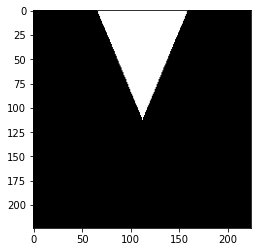

Сектор 2


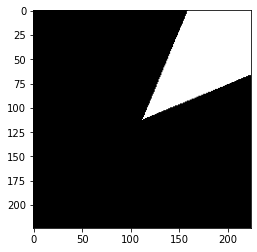

Сектор 3


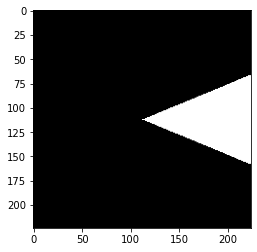

Сектор 4


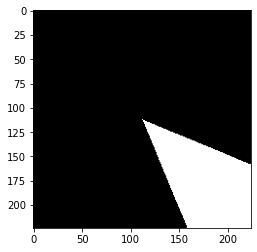

Сектор 5


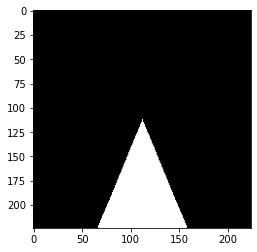

Сектор 6


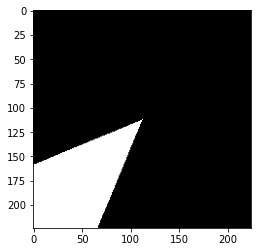

Сектор 7


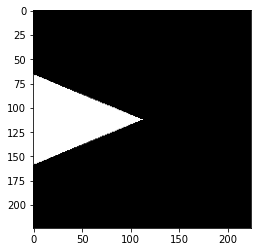

Сектор 8


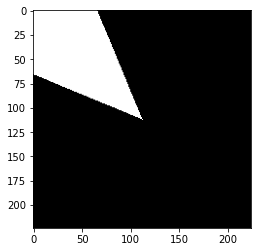

In [108]:
all_masks = "🡹1; 🡽2; 🡺3; 🡾4; 🡻5; 🡿6; 🢀7; 🡼8"
p = 224
x = p/2/(1+np.sqrt(2))
y = p/np.sqrt(2)/(1+np.sqrt(2))

mask1 = np.zeros((p,p))
for i in range(p):
    for j in range(p):
        if (j >= 2*x/p* i + y) and (j <= - 2*x/p* i + p/2 + x):
            mask1[i,j] = 1        
print('Сектор 1')            
see_plot(mask1)
#============================================================

mask2 = np.zeros((p,p))
for i in range(p):
    for j in range(p):                          
        if (j >= -2*x/p* i + p/2 + x) and (i <= - 2*x/p* j + p/2 + x):
            mask2[i,j] = 1
print('Сектор 2')            
see_plot(mask2)
#============================================================

mask3 = np.zeros((p,p))
for i in range(p):
    for j in range(p):                          
        if (i <= 2*x/p* j + y) and (i >= - 2*x/p* j + p/2 + x):
            mask3[i,j] = 1
print('Сектор 3')            
see_plot(mask3)
#============================================================

mask4 = np.zeros((p,p))
for i in range(p):
    for j in range(p):                          
        if (i >= 2*x/p* j + y) and (j >= 2*x/p* i + y):
            mask4[i,j] = 1
print('Сектор 4')            
see_plot(mask4)
#============================================================

mask5 = np.zeros((p,p))
for i in range(p):
    for j in range(p):
        if (j <= 2*x/p* i + y) and (j >= - 2*x/p* i + p/2 + x):
            mask5[i,j] = 1           
print('Сектор 5')            
see_plot(mask5)
#============================================================

mask6 = np.zeros((p,p))
for i in range(p):
    for j in range(p):                          
        if (j <= -2*x/p* i + p/2 + x) and (i >= - 2*x/p* j + p/2 + x):
            mask6[i,j] = 1
print('Сектор 6')            
see_plot(mask6)
#============================================================

mask7 = np.zeros((p,p))
for i in range(p):
    for j in range(p):                          
        if (i >= 2*x/p* j + y) and (i <= - 2*x/p* j + p/2 + x):
            mask7[i,j] = 4
print('Сектор 7')            
see_plot(mask7)
#============================================================

mask8 = np.zeros((p,p))
for i in range(p):
    for j in range(p):                          
        if (i <= 2*x/p* j + y) and (j <= 2*x/p* i + y):
            mask8[i,j] = 1
print('Сектор 8')            
see_plot(mask8)
#============================================================

all_sectors = {'sector1': mask1,
               'sector2': mask2,
               'sector3': mask3,
               'sector4': mask4,
               'sector5': mask5,
               'sector6': mask6,
               'sector7': mask7,
               'sector8': mask8}

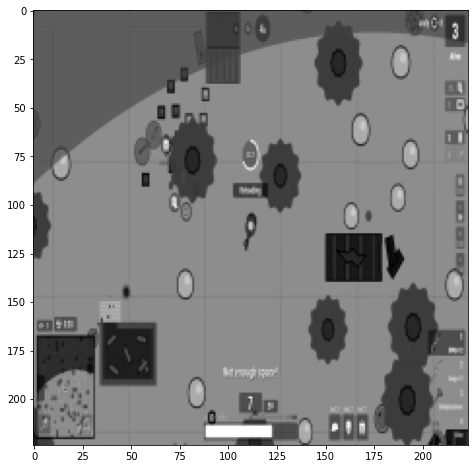

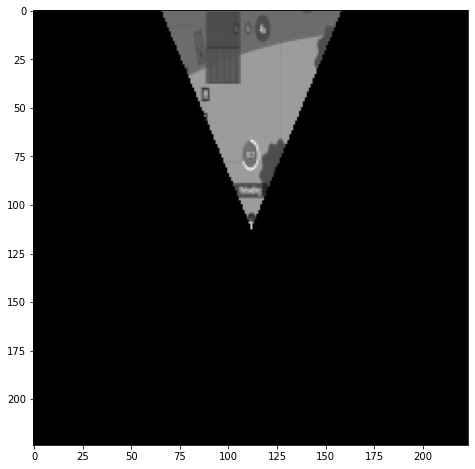

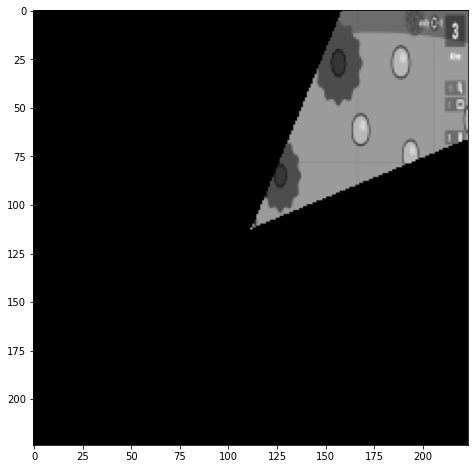

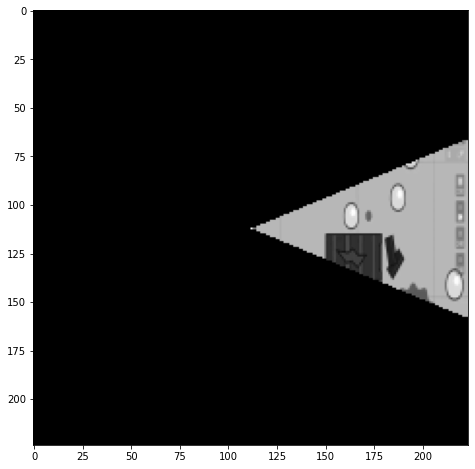

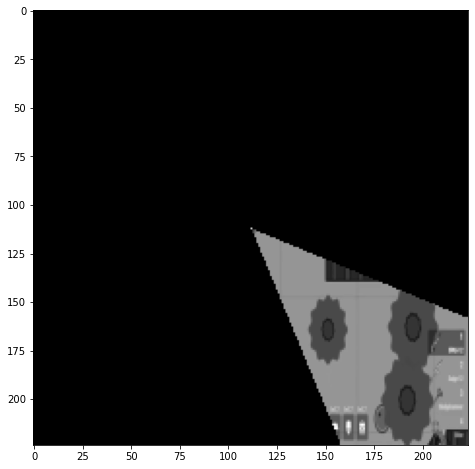

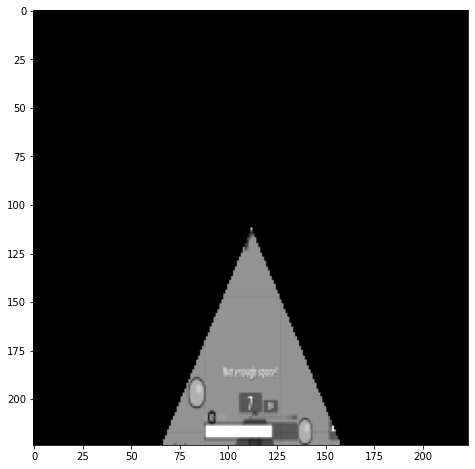

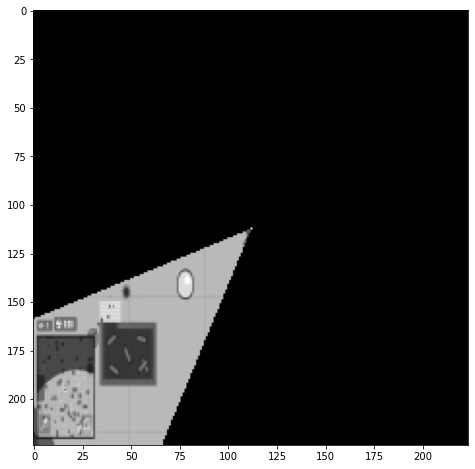

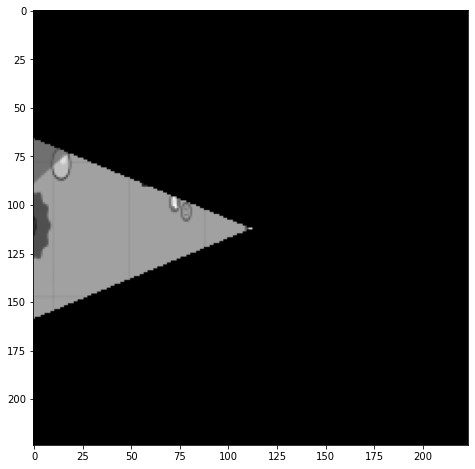

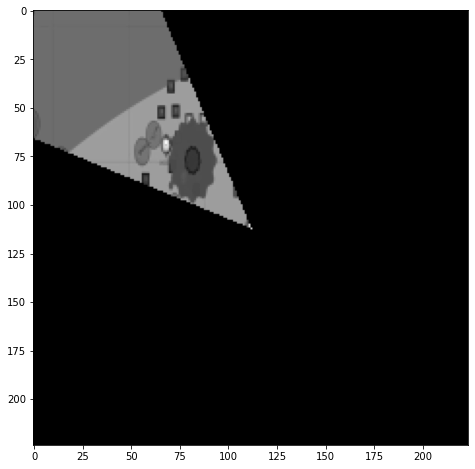

In [111]:
n = 200000
path = '/media/laggg/surviv_rl_data/all_videoframes/'+\
        df['video'][n]+\
        '/frames/f_{}.jpg'.format(df['frame'][n])
image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
p= cv2.resize(image, (224,224), interpolation=cv2.INTER_AREA).astype(np.float32)/255.
see_plot(p, size=(8,8))

all_masks = "🡹1; 🡽2; 🡺3; 🡾4; 🡻5; 🡿6; 🢀7; 🡼8"
for sector in all_sectors.keys():
    # !--------------------------!
    new_p = p*all_sectors[sector]
    # !--------------------------!
    see_plot(new_p, size=(8,8))